# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Modelos de clasificación con Keras

### Red neuronal sencilla con aprendizaje supervizado

Dado que vamos a trabajar con imagenes, lo primero es instalar OpenCV (OpenCV-Python es una librería de enlaces Python diseñada para resolver problemas de visión por computador).

    pip3 install opencv-python

En primer lugar, vamos a importar las librerías necesarias. Importaremos las librerías de numpy, TensorFlow (éste será el framework sobre el que correrá Keras), Keras y unas librerías necesarias Scikit Learn, Pandas, etc.

In [3]:
import numpy as np
from scipy import misc
from PIL import Image
import glob
import matplotlib.pyplot as plt
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import SVG
import cv2
import seaborn as sn
import pandas as pd
import pickle
from keras import layers
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import layer_utils, np_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model #Path modificado!
from keras.utils.vis_utils import plot_model
from keras.initializers import glorot_uniform
from keras import losses
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

El siguiente paso es preparar los datos de entrenamiento. Keras puede acceder a algunos datos listos para utilizar, usaremos el conjunto de datos CIFAR-100. Este conjunto de datos consta de 60000 imágenes por cada clase de un total de 100 clases. Se divide en 50000 imágenes para entrenamiento y 10000 imágenes para validación por cada clase. Las 10000 clases están agrupadas en 20 superclases. Cada imagen tiene una etiqueta "fina" (la clase, de entre las 100, a la que pertenece) y una etiqueta "gruesa" (correspondiente a su superclase).

El framework de Keras incluye el módulo para descargarlo directamente:

In [4]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 2s 0us/step


Hasta el momento se ha descargado los datasets de entrenamiento y validación. *x_train_original* y *x_test_original* son los conjuntos de datos con lás imágenes de entrenamiento y validación respectivamente, mientras que *y_train_original* y *y_test_original* son los datasets con las etiquetas.

Veamos la forma de *y_train_original* (etiquetas de los datos de entrenamiento):

In [5]:
y_train_original.shape

(50000, 1)

In [9]:
y_test_original.shape

(10000, 1)

In [8]:
y_train_original

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

Se trata de un array donde cada número se corresponde con la etiqueta concreta. Lo primero que hay que hacer es convertir este array en su versión **one-hot-encoding** (grupo de bits entre los cuales las combinaciones posibles son solo aquellas con un solo bit alto (1) y todas las demás ceros (0)).

In [10]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [11]:
y_train.shape

(50000, 100)

In [12]:
y_test.shape

(10000, 100)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Los datos de entrenamiento (*x_train_original*) son de la forma:

In [6]:
x_train_original.shape

(50000, 32, 32, 3)

In [7]:
x_train_original[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

Lo cual representa cada imagen (50000 en total) en los 3 canales RGB, cada uno de 256 píxeles. Veamos una, la última por ejemplo:

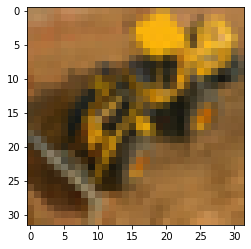

In [17]:
imgplot = plt.imshow(x_train_original[49999])
plt.show()

Lo que haremos a continuación, es normalizar las imágenes. Esto es, dividiremos cada elemento de *x_train_original* y *x_test_original* por el máximo valor de cada píxel, es decir, 255. Con esto se tendrá que el array comprenderá solo valores de entre 0 y 1, lo cual como ya se ha mencionado, corresponde a los valores de funcionamiento de las neuronas.

In [18]:
x_train = x_train_original/255.0
x_test = x_test_original/255.0

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

### Preparanción del entorno

El siguiente paso es definir ciertos parametros sobre el experimento en Keras. Lo primero será especificar a Keras dónde se encuentran los canales. En un array de imagenes, pueden venir como último indice o como el primero. Esto se conoce como canales primero (channels first) o canales al final (channels last). En nuestro caso, vamos a definirlos al final. El parámetro *image_data_format* afecta la forma en que cada uno de los frameworks trata las dimensiones de los datos. Específicamente, define dónde está la dimensión de los canales en los datos de entrada. Para Tensorflow o CNTK debe ser *channels_last*, para Theano debería ser *channels_first*.

In [21]:
K.set_image_data_format('channels_last')

Lo siguiente que vamos a especificar es la fase del experimento. En este caso, la fase será de entrenamiento (posibles valores: 0 y 1, en mis pruebas, sin embargo, 0 produce errores muy altos, razón por la que siempre utilizo 1!!!).

In [22]:
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


### Arquitectura de la red: Red neuronal estática multicapa

Definimos un procedimiento que nos devuelva una red neuronal, en este caso una multicapa estática con dos (2) capas ocultas:

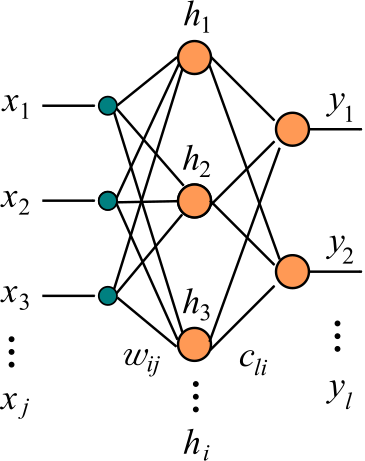

In [23]:
from IPython.display import SVG
SVG(valid_path + 'intro_fig26.svg')

Funciones de activación disponibles:
- activation='tanh' - Tangente hiperbólica (-1 a 1).
- activation='sigmoid' - Sigmoide o logística (0 a 1).
- activation='hard_sigmoid' - Umbral lógico, mas rapida de calcular que la sigmoide (0 a 1).
- activation='linear' - Función lineal.
- activation='exponential' - Función de base exponencial
- activation='softmax' - Función exponencial normalizada utilizada en clasificación (0 a 1).
- activation='elu' - Exponential Linear Unit (puede producir salidas negativas).
- activation='selu' - Scaled Exponential Linear Unit (scale * elu(x, alpha)).
- activation='softplus' - Alternativa derivable a las tradicionales (log(exp(x) + 1)).
- activation='softsign' - Alternativa a tangente hiperbólica (x / (abs(x) + 1)).
- activation='relu' - Rectified Linear Unit (no produce salidas negativas, 0 a 1).

La API *Sequential* le permite crear modelos capa por capa para la mayoría de los problemas. Está limitado en el sentido de que no permite crear modelos que compartan capas o tengan múltiples entradas o salidas.

Alternativamente, la API *Functional* le permite crear modelos que tienen mucha más flexibilidad, ya que puede definir fácilmente modelos en los que las capas se conectan con algo más que las capas anteriores y siguientes. De hecho, puede conectar capas a (literalmente) cualquier otra capa.

In [24]:
def create_simple_nn():
  model = Sequential() # El modelo secuencial es una pila lineal de capas.
  model.add(Flatten(input_shape=(32, 32, 3), name="Input_layer")) # Agrega capas, la primera con input_shape
  model.add(Dense(1000, activation='relu', name="Hidden_layer_1"))
  model.add(Dense(500, activation='relu', name="Hidden_layer_2"))
  model.add(Dense(100, activation='softmax', name="Output_layer"))
  return model

Se puede omitir *input_shape* de la primera capa, en cuyo caso se construye el formato cuando se llama por primera vez a *fit* o cualquier otro metodo de entrenamiento/propagación.

La instrucción *Flatten* convierte los elementos de la matriz de imagenes de entrada en un array plano. Luego, con la instrucción *Dense*, añadimos una capa oculta (hidden layer) de la red neuronal. La primera tendrá 1000 neuronas, la segunda 500 y la tercera (capa de salida) 100. Para la función de activación usaremos en las capas ocultas ReLu y para la capa de salida SoftMax.

Una vez definido el modelo, lo compilamos especificando la función de optimización, la de coste o pérdida y las métricas que usaremos. En este caso, usaremos la función de optimización de descenso de gradiente estocástico (stochactic gradient descent), la función de pérdida de entropía cruzada (categorical cross entropy, métrica que puede utilizarse para reflejar la precisión de los pronósticos) y, para las métricas, accuracy (o tasa de acierto) y mse (media de los errores cuadráticos). Todas éstas funciones ya vienen preimplementadas en Keras.

In [25]:
snn_model = create_simple_nn()
snn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

Una vez hecho esto, vamos a ver un resumen del modelo creado:

In [26]:
snn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 3072)              0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 1000)              3073000   
                                                                 
 Hidden_layer_2 (Dense)      (None, 500)               500500    
                                                                 
 Output_layer (Dense)        (None, 100)               50100     
                                                                 
Total params: 3,623,600
Trainable params: 3,623,600
Non-trainable params: 0
_________________________________________________________________


Se puede ver que, a pesar de ser un modelo simple de red neuronal, tiene que entrenar más de 3 millones de parámetros. Esta es la razón por la que existen herramientas como estos frameworks y el aprendizaje profundo, ya que para entrenar redes muy complejas se necesitaría ajustar grandes cantidades de parámetros.

Ahora sólo queda entrenar, para ello, haremos lo siguiente:

Le decimos a Keras que queremos usar para entrenar el dataset imágenes normalizadas de entrenamiento con el array de etiquetas one-hot-encoding. Usaremos batches o bloques de 32 (reduciendo la necesidad de memoria) y daremos 10 iteraciones completas (o epochs). Usaremos los datos para validar x_test e y_test. El proceso de entrenamiento lo iremos viendo a continuación hasta terminar. El resultado del entrenamiento se guarda en la variable snn, de la cual, extraeremos el histórico de los datos del entrenamiento.

Estructura de fit:
- x = Arreglo Numpy de datos de entrenamiento, o lista si el modelo tiene multiples entradas.
- y = Arreglo Numpy de datos de salida (etiquetas), o lista si el modelo tiene multiples salidas.
- batch_size = Entero o None. Número de muestras por actualización de gradiente. Si no se especifica, batch_size estará por defecto en 32.
- epochs = Entero. Número de épocas para entrenar al modelo. Un epoch es una iteración sobre la totalidad de los datos x e y proporcionados.
- verbose = Entero. 0, 1 ó 2. Modo Verbosidad. 0 = silencioso, 1 = una línea por epoch y barra de progreso, 2 = sin barra de progreso.
- callbacks = Lista de instancias de Callback. Lista de funciones a aplicar durante el entrenamiento y la validación.
- validation_split = Número en punto flotante entre 0 y 1. Fracción de los datos de entrenamiento a utilizar como datos de validación.
- validation_data = Tupla (x_val, y_val) sobre la cual evaluar las pérdidas y cualquier métrica del modelo al final de cada epoch. El modelo no será entrenado en estos datos. validation_data invalidará validation_split.
- shuffle = Booleano (para barajar los datos de entrenamiento antes de cada epoch) o str (para 'batch' o por lote). batch es una opción especial para tratar las limitaciones de los datos HDF5; se barajan en trozos del tamaño de un lote. No tiene efecto cuando steps_per_epoch no es None.
- class_weight = Diccionario opcional que asigna índices de clase (enteros) a un valor de peso (flotante), utilizado para ponderar la función de pérdida (sólo durante el entrenamiento). Esto puede ser útil para decirle al modelo que "preste más atención" a las muestras de una clase subrepresentada.
- sample_weight = Opcional Numpy array de pesos para las muestras de entrenamiento, utilizado para la ponderación de la función de pérdida (sólo durante el entrenamiento).
- initial_epoch = Entero. Epoch en la que se debe iniciar el entrenamiento (útil para reanudar un entrenamiento previo).
- steps_per_epoch = Entero o None. Número total de pasos (lotes de muestras) antes de declarar finalizado un epoch y comenzar el epoch siguiente.
- validation_steps = Sólo es relevante si se especifica steps_per_epoch. Número total de pasos (lotes de muestras) a validar antes de detenerse.
- validation_freq = Sólo es relevante si se proporcionan datos de validación. Entero o lista/tupla/set. Si se trata de un número entero, especifica cuántos epoch de entrenamiento deben ejecutarse antes de que se realice una nueva ejecución de validación.

In [27]:
snn = snn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 4.1746 - acc: 0.0729 - mse: 0.0097 - val_loss: 3.9408 - val_acc: 0.1048 - val_mse: 0.0096
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.7885 - acc: 0.1281 - mse: 0.0095 - val_loss: 3.7400 - val_acc: 0.1377 - val_mse: 0.0094
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.6298 - acc: 0.1587 - mse: 0.0093 - val_loss: 3.6483 - val_acc: 0.1551 - val_mse: 0.0093
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.5242 - acc: 0.1783 - mse: 0.0092 - val_loss: 3.5761 - val_acc: 0.1664 - val_mse: 0.0093
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.4384 - acc: 0.1934 - mse: 0.0091 - val_loss: 3.5326 - val_acc: 0.1750 - val_mse: 0.0092
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3624 - acc: 0.2066 - mse: 0.0090 - val_loss: 3.4355 - val_acc: 0.2027 - val_mse: 0.0091
Epo

Aunque hemos evaluado durante el entrenamiento, podríamos evaluarlo frente a otro dataset, por lo que expongo a continuación cómo hacerlo en Keras:

In [28]:
evaluation = snn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)
evaluation # Las metricas mostradas son: 'loss', 'acc', 'mean_squared_error'

313/313 [==============================] - 1s 4ms/step - loss: 3.3134 - acc: 0.2204 - mse: 0.0089


[3.3134307861328125, 0.22040000557899475, 0.008884652517735958]

Como se observa la estructura es similar, el formato general del comando es el siguiente:

    evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None)

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente:

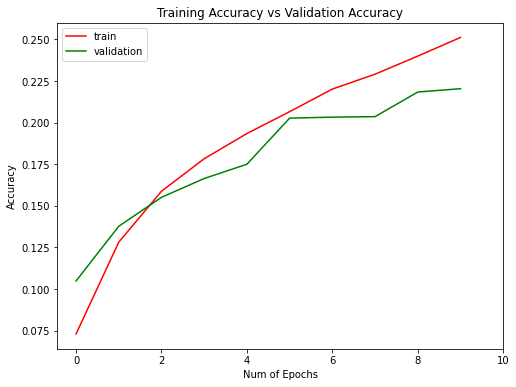

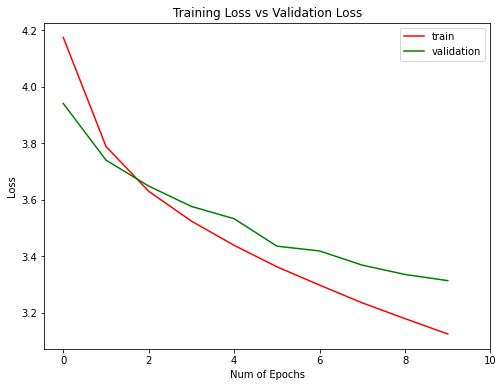

In [31]:
plt.figure(0)
plt.plot(snn.history['acc'],'r')
plt.plot(snn.history['val_acc'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy") # Aciertos
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(snn.history['loss'],'r')
plt.plot(snn.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss") # Fallos
plt.legend(['train','validation'])
 
plt.show()

Como vemos, a priori no generaliza demasiado bien, ya que hay una diferencia de acierto de un 4% aproximadamente. Miremos esto con mas detalle.

## Herramientas para evaluación del modelo: Matriz de confusión y Curva ROC

### Matriz de confusión usando Scikit Learn

Una *matriz de confusión* es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

Si en los datos de entrada el número de muestras entre clases diferentes cambia mucho, la tasa de error del clasificador no es representativa de lo bien que realiza la tarea el clasificador. Si por ejemplo hay 990 muestras de la clase 1 y sólo 10 de la clase 2, el clasificador puede tener fácilmente un sesgo hacia la clase 1. Si el clasificador clasifica todas las muestras como clase 1 su precisión será del 99%. Esto no significa que sea un buen clasificador, pues tuvo un 100% de error en la clasificación de las muestras de la clase 2.

En la matriz ejemplo que aparece a continuación, de 8 gatos reales, el sistema predijo que tres eran perros y de seis perros predijo que uno era un conejo y dos eran gatos. A partir de la matriz se puede ver que el sistema tiene problemas distinguiendo entre gatos y perros, pero que puede distinguir razonablemente bien entre conejos y otros animales.

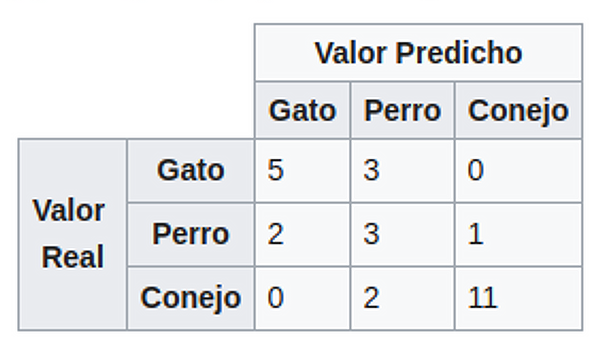

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig8.png')

Una vez se ha entrenado el modelo, es posible ver otras métricas. Para ello, crearemos la matriz de confusión y, a partir de ella, veremos las métricas **precission**, **recall** y **F1-score**.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente.

In [32]:
snn_pred = snn_model.predict(x_test, batch_size=32, verbose=1)
snn_predicted = np.argmax(snn_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


El formato general para el comando **predict** es:

    predict(x, batch_size=None, verbose=0, steps=None, callbacks=None)

Como podemos ver, vamos a dar como predecida el mayor valor de la predicción. Lo normal es dar un valor mínimo o bias que defina un resultado como positivo, pero en este caso, lo vamos a hacer simple.

Con la librería Scikit Learn, generamos la matriz de confusión y la dibujamos (aunque el gráfico no es muy bueno debido al numero de etiquetas).

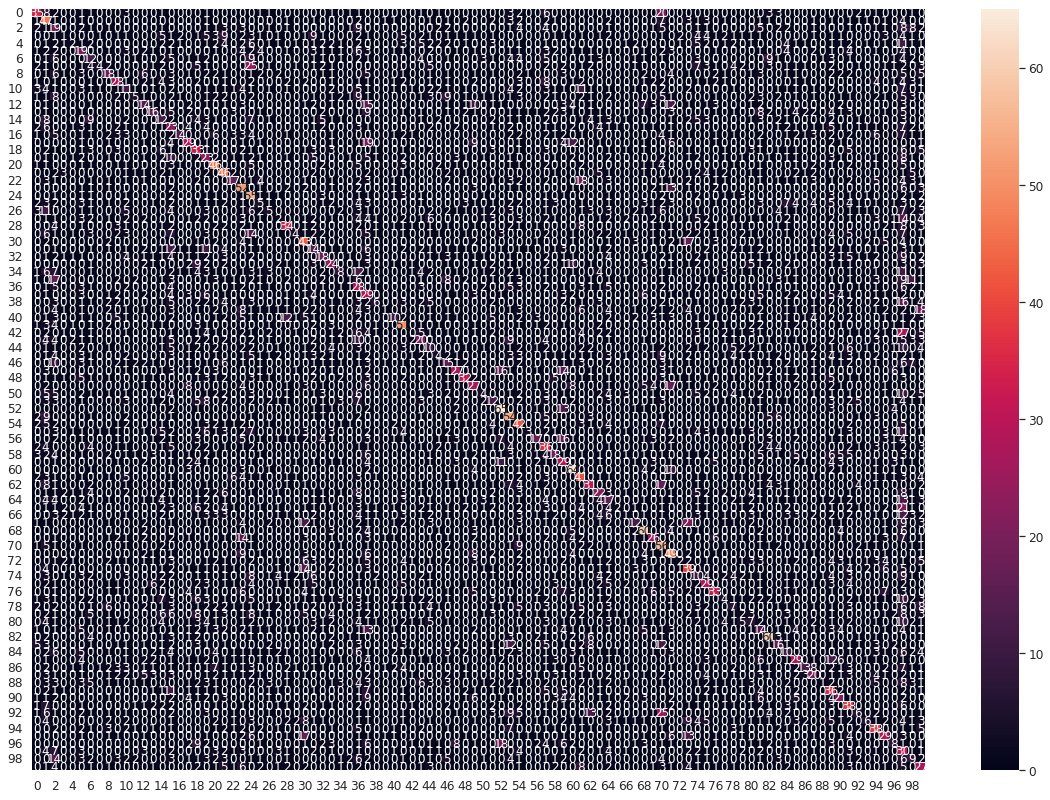

In [33]:
# Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(y_test, axis=1), snn_predicted)

# Visualiamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(100), range(100))
plt.figure(figsize = (20,14))
sn.set(font_scale=1.1) # Para el tamaño de las etiquetas
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # Tamaño de la fuente
plt.show()

- **Accuracy (Exactitud)**: En general, ¿con qué frecuencia es correcto el clasificador? Suma de la diagonal/clasificaciones totales. 0 a 1 en porcentaje.
- **Tasa de errores de clasificación**: En general, ¿con qué frecuencia está mal? Falsos positivos/clasificaciones totales.
- **Precision**: La precisión es la relación entre las observaciones positivas correctamente predichas y el total de observaciones positivas predichas. 0 a 1 en porcentaje.
- **Recall (Sensibilidad)**: Recall es la relación entre las observaciones positivas correctamente predichas y todas las observaciones en la clase real. ¿de todos los positivos, cuantos clasificó? Por encima de 0.5 es un buen valor.
- **F1 score**: F1 Score es el promedio ponderado de Precision y Recall. Por lo tanto, esta puntuación tiene en cuenta tanto los falsos positivos como los falsos negativos. Intuitivamente no es tan fácil de entender como la precisión, pero F1 suele ser más útil que la precisión, especialmente si tiene una distribución de clases desigual. La precisión funciona mejor si los falsos positivos y los falsos negativos tienen un costo similar. Si el costo de los falsos positivos y falsos negativos es muy diferente, es mejor mirar tanto a Precision como a Recall.

Y por último, mostramos las métricas:

In [34]:
snn_report = classification_report(np.argmax(y_test, axis=1), snn_predicted)
print(snn_report)

              precision    recall  f1-score   support

           0       0.42      0.35      0.38       100
           1       0.19      0.47      0.27       100
           2       0.09      0.19      0.12       100
           3       0.05      0.01      0.02       100
           4       0.14      0.02      0.04       100
           5       0.15      0.19      0.17       100
           6       0.12      0.12      0.12       100
           7       0.50      0.04      0.07       100
           8       0.23      0.18      0.20       100
           9       0.34      0.28      0.31       100
          10       0.11      0.11      0.11       100
          11       0.28      0.05      0.08       100
          12       0.19      0.14      0.16       100
          13       0.29      0.16      0.21       100
          14       0.12      0.12      0.12       100
          15       0.10      0.23      0.14       100
          16       0.67      0.14      0.23       100
          17       0.33    

Guía para interpretar valores:
- 1.0: Predicción perfecta
- 0.9: Excelente predicción
- 0.8: Buena predicción
- 0.7: Predicción mediocre
- 0.6: Pobre predicción
- 0.5: Predicción aleatoria
- <0.5: Algo esta mal con el modelo!

Esta es solo una guía, pero como se ha dicho en todo el curso, la interpretación **depende de la aplicación**. No es lo mismo clasificar un intento de fraude que predecir si va a llover.

### Curva ROC (Receiver Operator Characteristic, tasas de verdaderos positivos y falsos positivos)

Es una grafica muy utilizada que resume el desempeño de un clasificador sobre todos los posibles umbrales (valor que separa las categorias). Esta es generada graficando en el eje vertical la rata de **verdaderos positivos** contra la rata de **falsos positivos** en el eje horizontal, a medida que se varia el umbral (separación entre las dos categorias) para la asignación de observaciones para una determinada categoría. No esta relacionada directamente con la matriz de confusión.

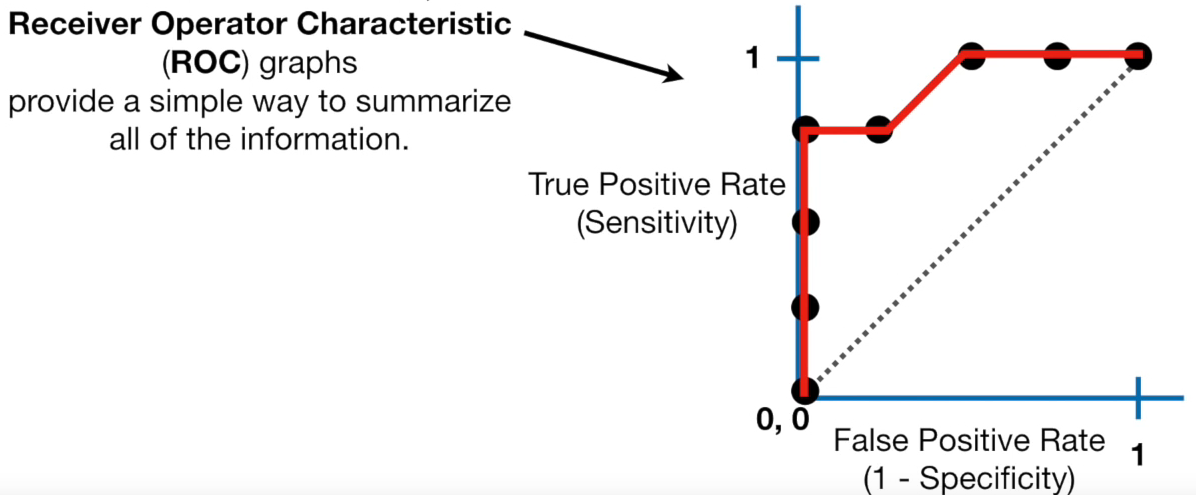

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig9.png')

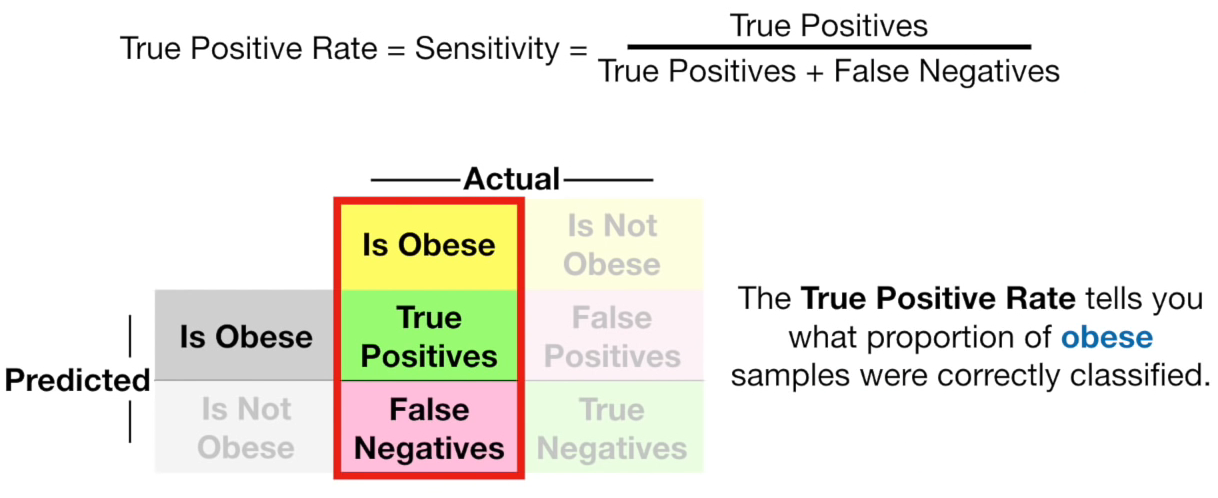

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig10.png')

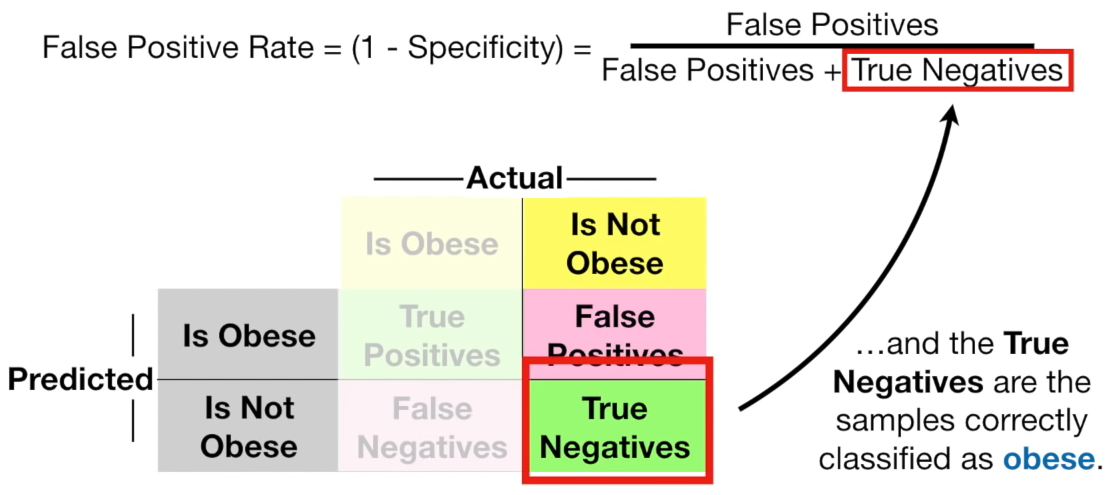

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig11.png')

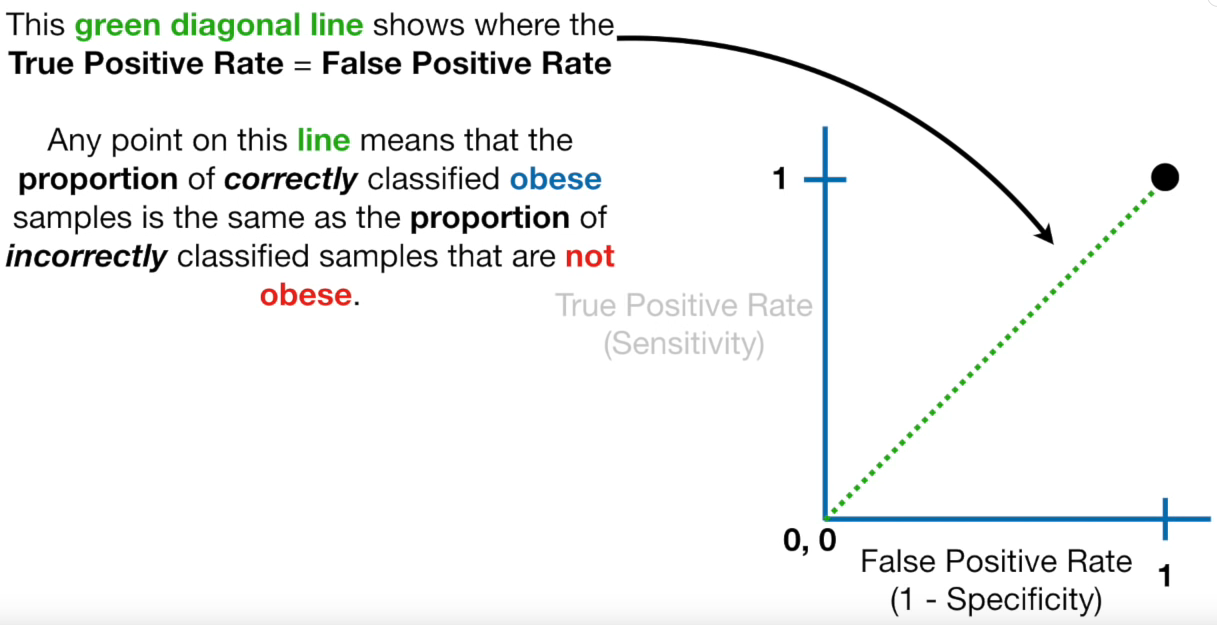

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig12.png')

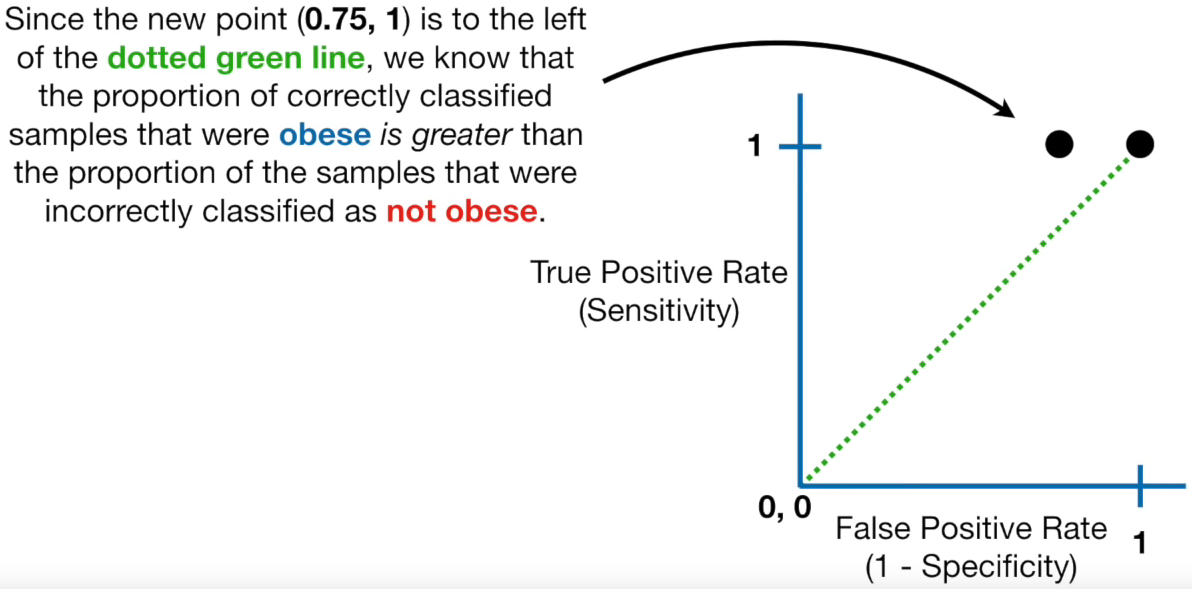

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig13.png')

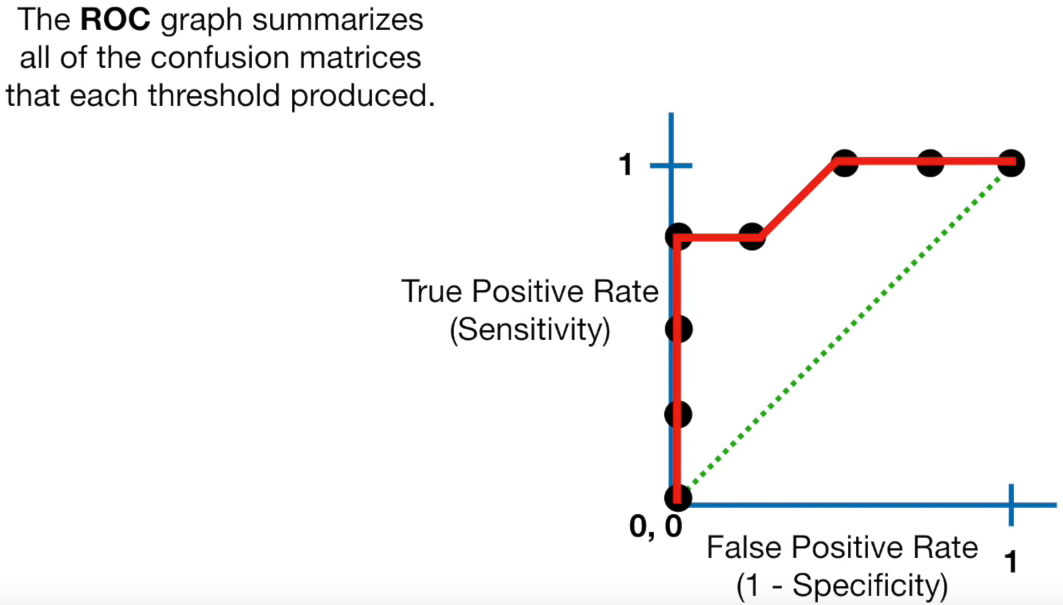

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig14.png')

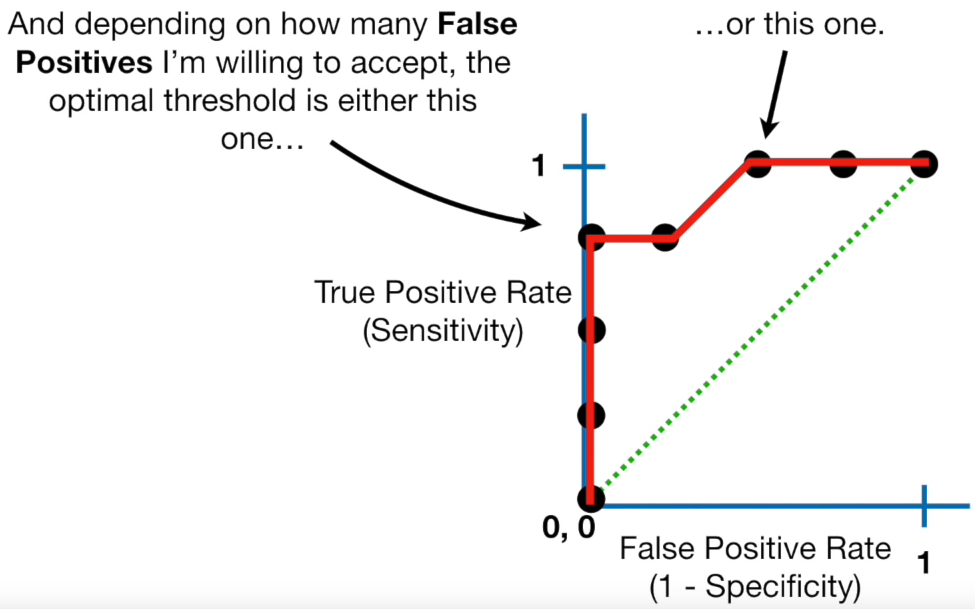

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig15.png')

La curva ROC inicialmente es usada en los clasificadores binarios por ser una buena herramienta para enfrentar la tasa de positivos reales contra los falsos positivos. En este caso, se va a codificar la curva ROC para clasificación multiclase.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


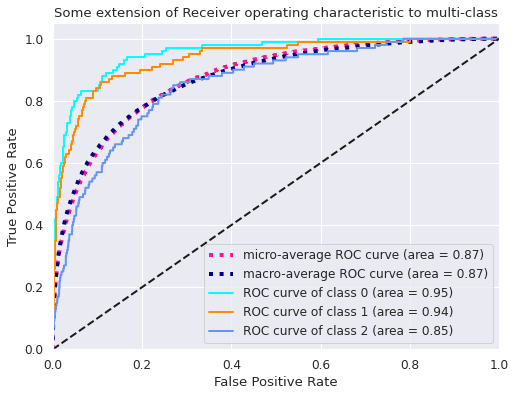

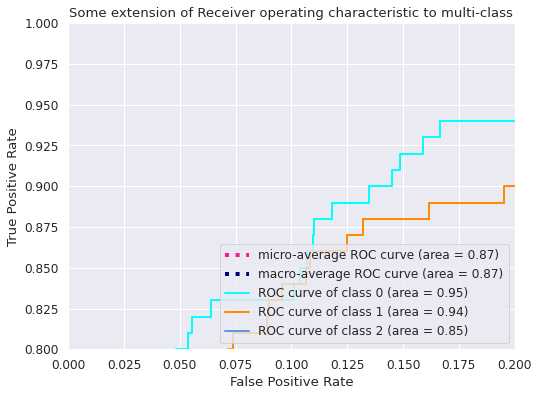

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], snn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), snn_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

La segunda grafica muestra el área bajo cada curva, la mejor categorización se consigue con las áreas más grandes (azul).

Finalmente, vamos a ver algunos resultados.

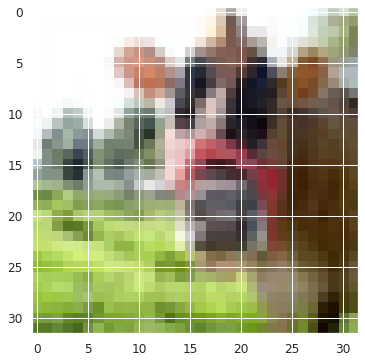

Categoria para la imagen: 49
Categoria estimada:         76


In [ ]:
imgplot = plt.imshow(x_train_original[0])
plt.show()
print('Categoria para la imagen: ' + str(np.argmax(y_test[0])))
print('Categoria estimada:         ' + str(snn_predicted[0]))

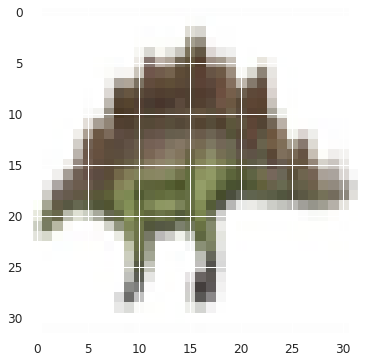

Categoria para la imagen: 33
Categoria estimada:         38


In [ ]:
imgplot = plt.imshow(x_train_original[1])
plt.show()
print('Categoria para la imagen: ' + str(np.argmax(y_test[1])))
print('Categoria estimada:         ' + str(snn_predicted[1]))

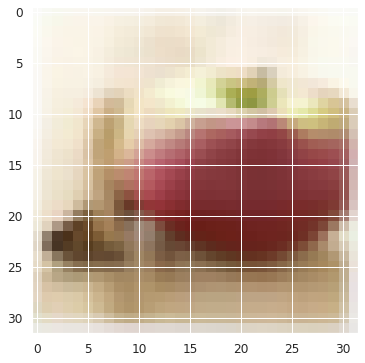

Categoria para la imagen: 72
Categoria estimada:         15


In [ ]:
imgplot = plt.imshow(x_train_original[2])
plt.show()
print('Categoria para la imagen: ' + str(np.argmax(y_test[2])))
print('Categoria estimada:         ' + str(snn_predicted[2]))

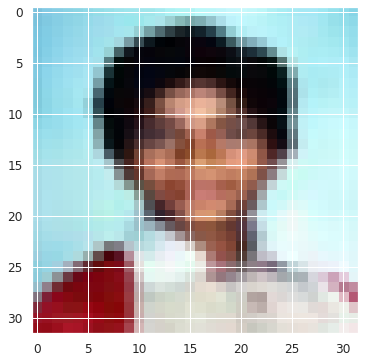

Categoria para la imagen: 51
Categoria estimada:         57


In [ ]:
imgplot = plt.imshow(x_train_original[3])
plt.show()
print('Categoria para la imagen: ' + str(np.argmax(y_test[3])))
print('Categoria estimada:         ' + str(snn_predicted[3]))

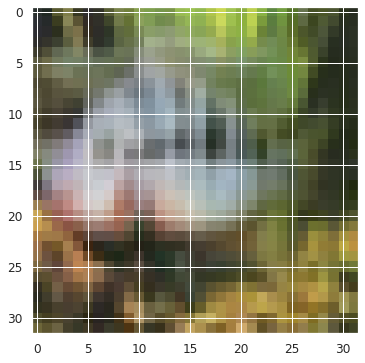

Categoria para la imagen: 71
Categoria estimada:         71


In [ ]:
imgplot = plt.imshow(x_train_original[4])
plt.show()
print('Categoria para la imagen: ' + str(np.argmax(y_test[4])))
print('Categoria estimada:         ' + str(snn_predicted[4]))

Finalmente, salvaremos los datos del histórico de entrenamiento para compararlos con otros modelos.

In [ ]:
# Histórico
with open(valid_path + 'simplenn_history.txt', 'wb') as file_pi:
  pickle.dump(snn.history, file_pi)

Para cargar y evaluar otros modelos:

    K.clear_session()
    K.set_learning_phase(1)
    test_gen.reset()
    model = load_model('tmpModel')
    print('After Load - learning_phase=0:', model.evaluate_generator(test_gen, test_steps))

### Conclusión sobre el experimento

Aunque no está mal para diez epochs, vemos que las gráficas de error no van a mejorar mucho mas, pues estan empezando a ponerse horizontales, lo que indica que aumentar mucho más las iteraciones de entrenamiento no van a mejorar el aprendizaje. Si bien la curva ROC da una buena tasa de positivos reales contra falsos positivos (es decir, cuando especifica una clase, no suele dar un falso positivo), el nivel de acierto es muy bajo para las métricas accuracy, recall y precission.

### Imagenes propias (pendiente!!!!!)

Al crear un modelo de clasificación lo normal es entrenarlo para nuestras propias necesidades, y por tanto con nuestras propias imagenes o dataset, vamos a ver como hacer esto con un conjunto de imagenes de animales almacenadas en nuestro disco duro, en nuestro caso organizadas en tres categorias cada una en una carpeta. Si trabaja con su propio conjunto de datos, ¡organícelo de la misma manera! Lo ideal es reunir 1.000 imágenes por clase como mínimo. Esto no siempre es posible, pero al menos debe tener un equilibrio de clases. Un número significativamente mayor de imágenes en una carpeta de clase podría causar sesgo en el modelo.

El siguiente es el directorio *test_ani*. Este directorio contiene tres imágenes para propósitos de prueba que usaremos para demostrar cómo (1) cargar un modelo entrenado desde el disco y luego (2) clasificar una imagen de entrada que no es parte de nuestro conjunto de datos original.

La carpeta *output* contiene tres tipos de archivos que son generados por el entrenamiento:

- .model : Se genera un archivo de modelo Keras serializado después del entrenamiento y puede ser usado en futuros scripts de inferencia.
- .pickle : Un archivo binario de etiquetas serializado. Este archivo contiene un objeto que contiene nombres de clase. Acompaña a un archivo modelo.
- .png : Las imágenes de la gráfica de entrenamiento/validación en la carpeta de salida, utiles cuando se esta evaluando un modelo, como resultado del proceso de entrenamiento.